RNCP38616 – Bloc 05

C1 : Préparer des données non structurées en les convertissant en données numériques et sous forme tabulaires


C2 : Sélectionnez l'algorithme d'apprentissage en profondeur le plus adapté en comparant les performances et les caractéristiques des différentes familles d'algorithmes
 
 

C3 : Entraîner un modèle d'apprentissage profond en optimisant une fonction de perte à partir des données d'entraînement

 

C4 : Déployer efficacement un modèle d'apprentissage profond en utilisant des outils et plateformes de production adaptées (MLOps)



# 1.chargement des librairies

In [2]:
# Traitement des données
import pandas as pd
import numpy as np

# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Réseau de neurones (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization ,ReLU, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

# Visualisation
import matplotlib.pyplot as plt

# Chronométrage
import time
# sauvegarde du modèle
import joblib

# ANN classique


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 Modèle ANN Classique 
 RMSE : 219.99
 MAE  : 170.32
 R²   : 0.8134
 Temps d'entraînement : 9.77 secondes


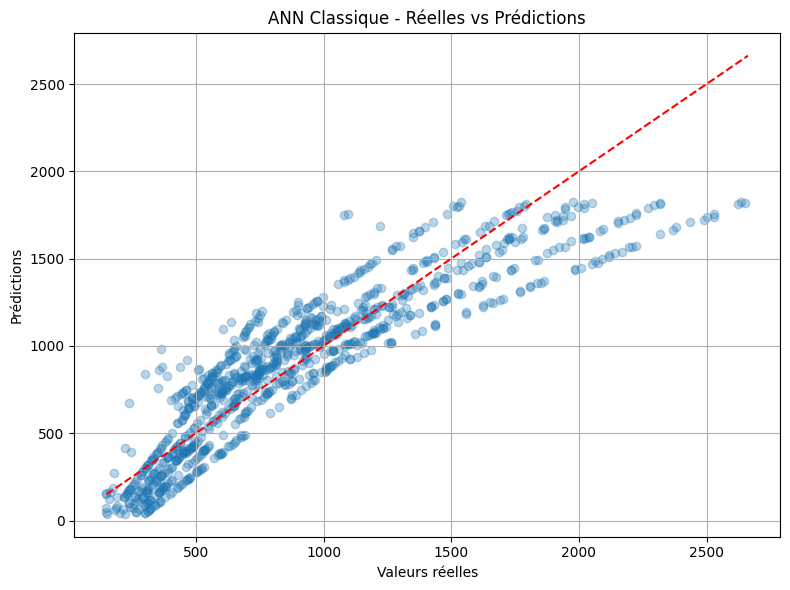

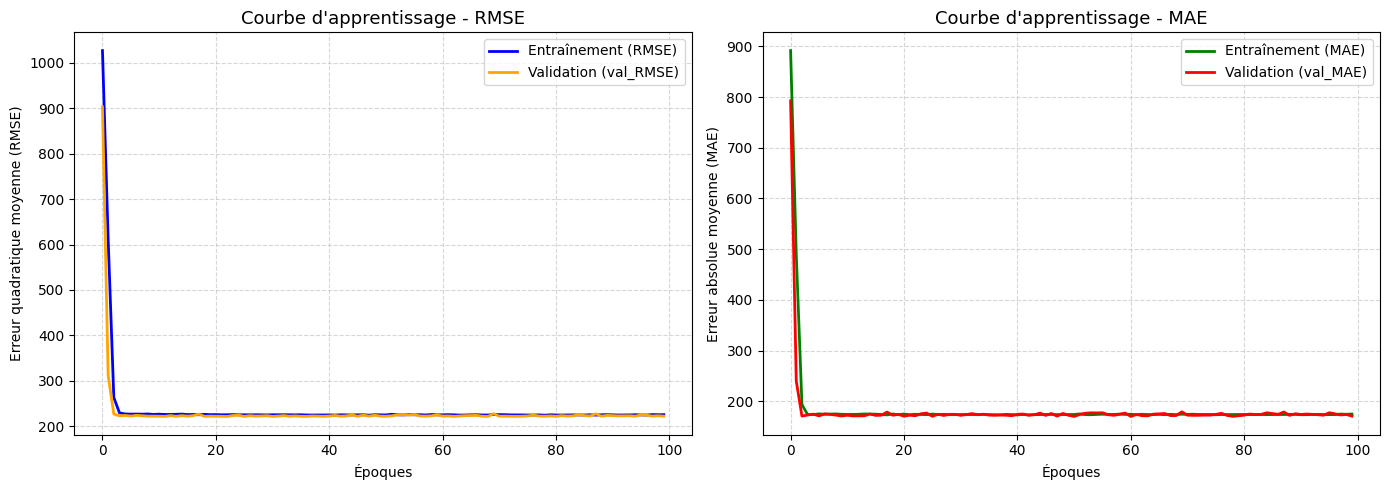

In [3]:
# 1. Chargement des données
df = pd.read_csv("personas_assurance.csv")
df = df.drop(columns=['client_id'])

# 2. Variables
X = df[['surface_m2', 'statut_logement', 'patrimoine_estime','montant_couvert']]
y = df['cotisation_annuelle']

# 3. Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Prétraitement (OneHot + StandardScaler)
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# 5. modèle ANN Classique
model_classic = Sequential([
    Dense(64),
    Dense(32),
    Dense(16),
    Dense(1)
])

model_classic.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Entraînement
start_time = time.time()
history_classic = model_classic.fit(
    X_train_prep, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)
training_duration_classic = time.time() - start_time

# 7. Évaluation
y_pred_classic = model_classic.predict(X_test_prep).flatten()
rmse_classic = np.sqrt(mean_squared_error(y_test, y_pred_classic))
mae_classic = mean_absolute_error(y_test, y_pred_classic)
r2_classic = r2_score(y_test, y_pred_classic)

print(" Modèle ANN Classique ")
print(f" RMSE : {rmse_classic:.2f}")
print(f" MAE  : {mae_classic:.2f}")
print(f" R²   : {r2_classic:.4f}")
print(f" Temps d'entraînement : {training_duration_classic:.2f} secondes")

# 8. Graphique : Réelles vs Prédictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_classic, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("ANN Classique - Réelles vs Prédictions")
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Courbes d'apprentissage RMSE / MAE
rmse_train = np.sqrt(history_classic.history['loss'])
rmse_val = np.sqrt(history_classic.history['val_loss'])
mae_train = history_classic.history['mae']
mae_val = history_classic.history['val_mae']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(rmse_train, label='Entraînement (RMSE)', color='blue', linewidth=2)
axs[0].plot(rmse_val, label='Validation (val_RMSE)', color='orange', linewidth=2)
axs[0].set_title("Courbe d'apprentissage - RMSE", fontsize=13)
axs[0].set_xlabel("Époques")
axs[0].set_ylabel("Erreur quadratique moyenne (RMSE)")
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].legend(fontsize=10)

axs[1].plot(mae_train, label='Entraînement (MAE)', color='green', linewidth=2)
axs[1].plot(mae_val, label='Validation (val_MAE)', color='red', linewidth=2)
axs[1].set_title("Courbe d'apprentissage - MAE", fontsize=13)
axs[1].set_xlabel("Époques")
axs[1].set_ylabel("Erreur absolue moyenne (MAE)")
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].legend(fontsize=10)

plt.tight_layout()
plt.show()




# ANN avec LeakyRelu et early_stop

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
 Modèle ANN avec LeakyReLU 
  RMSE : 185.11
  MAE  : 130.09
  R²   : 0.8679
  Temps d'entraînement : 28.82 secondes


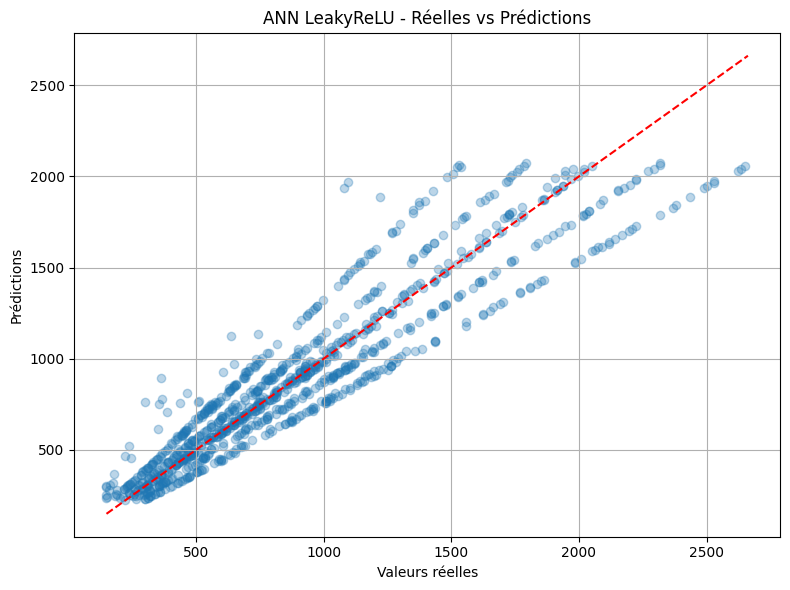

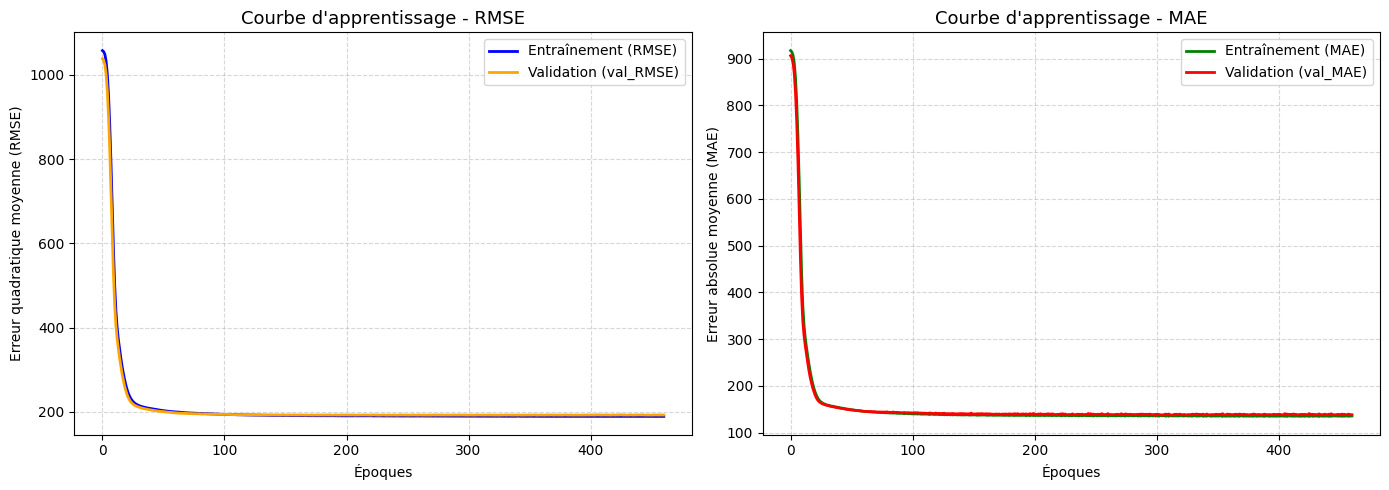

✅ Modèle et prétraitement sauvegardés.


In [12]:
# 1. Chargement des données
df = pd.read_csv("personas_assurance.csv")
df = df.drop(columns=['client_id'])

# 2. Variables
X = df[['surface_m2', 'statut_logement', 'patrimoine_estime','montant_couvert']]
y = df['cotisation_annuelle']

# 3. Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Prétraitement (OneHot + StandardScaler)
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# 5. Définition du modèle ANN
model_leaky = Sequential([
    Dense(32),
    LeakyReLU(negative_slope=0.05),
    Dense(16),
    LeakyReLU(negative_slope=0.02),
    Dense(1)
])

model_leaky.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Early stopping
early_stop = EarlyStopping(patience=90, restore_best_weights=True)

# 7. Entraînement
start_time = time.time()
history_leaky = model_leaky.fit(
    X_train_prep, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)
training_duration_leaky = time.time() - start_time

# 8. Évaluation
y_pred_leaky = model_leaky.predict(X_test_prep).flatten()
rmse_leaky = np.sqrt(mean_squared_error(y_test, y_pred_leaky))
mae_leaky = mean_absolute_error(y_test, y_pred_leaky)
r2_leaky = r2_score(y_test, y_pred_leaky)

print(" Modèle ANN avec LeakyReLU ")
print(f"  RMSE : {rmse_leaky:.2f}")
print(f"  MAE  : {mae_leaky:.2f}")
print(f"  R²   : {r2_leaky:.4f}")
print(f"  Temps d'entraînement : {training_duration_leaky:.2f} secondes")

# 9. Graphique : Réelles vs Prédictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_leaky, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("ANN LeakyReLU - Réelles vs Prédictions")
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Courbes d’apprentissage
rmse_train = np.sqrt(history_leaky.history['loss'])
rmse_val = np.sqrt(history_leaky.history['val_loss'])
mae_train = history_leaky.history['mae']
mae_val = history_leaky.history['val_mae']

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Graphique 1 : RMSE ---
axs[0].plot(rmse_train, label='Entraînement (RMSE)', color='blue', linewidth=2)
axs[0].plot(rmse_val, label='Validation (val_RMSE)', color='orange', linewidth=2)
axs[0].set_title("Courbe d'apprentissage - RMSE", fontsize=13)
axs[0].set_xlabel("Époques")
axs[0].set_ylabel("Erreur quadratique moyenne (RMSE)")
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].legend(fontsize=10)

# --- Graphique 2 : MAE ---
axs[1].plot(mae_train, label='Entraînement (MAE)', color='green', linewidth=2)
axs[1].plot(mae_val, label='Validation (val_MAE)', color='red', linewidth=2)
axs[1].set_title("Courbe d'apprentissage - MAE", fontsize=13)
axs[1].set_xlabel("Époques")
axs[1].set_ylabel("Erreur absolue moyenne (MAE)")
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].legend(fontsize=10)

plt.tight_layout()
plt.show()
 
 # 11. Sauvegarde du modèle et du prétraitement
model_leaky.save("model_ann_leakyrelu.keras") 
joblib.dump(preprocessor, "preprocessor.pkl")
print("✅ Modèle et prétraitement sauvegardés.")



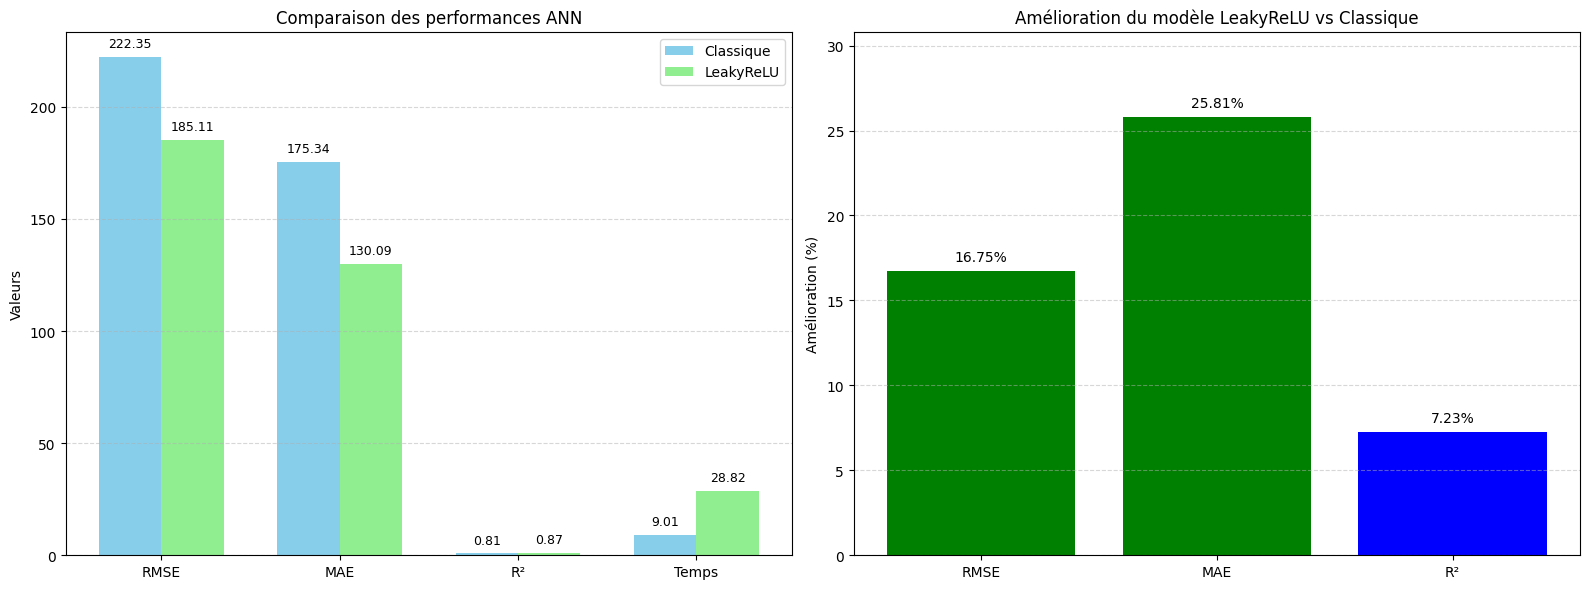

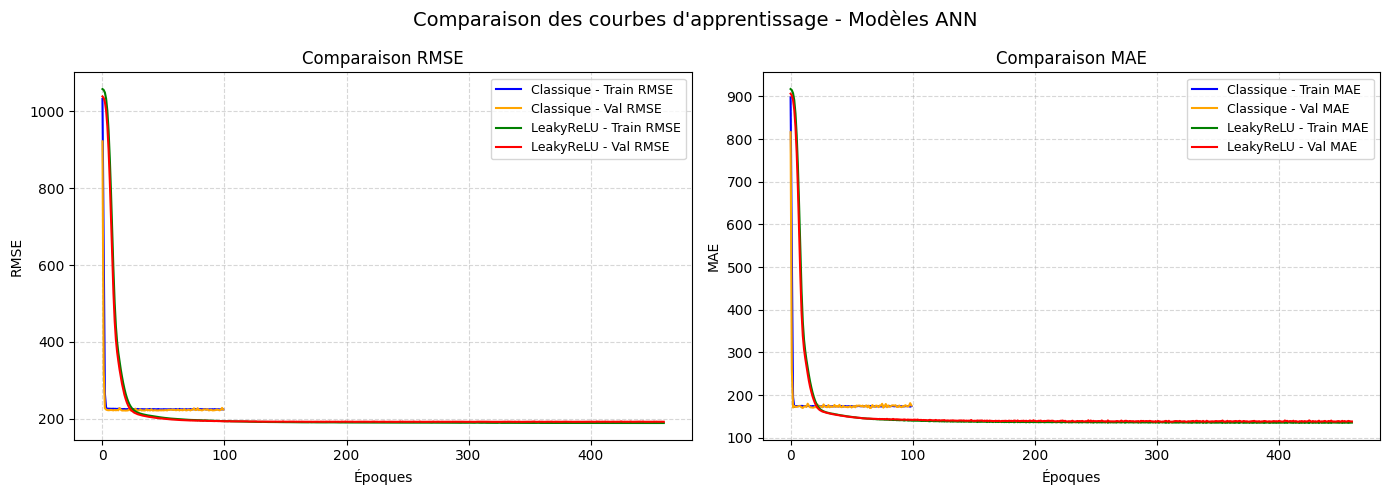

In [13]:
# Données
labels_perf = ['RMSE', 'MAE', 'R²', 'Temps']
x = np.arange(len(labels_perf))
width = 0.35

# Performances classiques et LeakyReLU
classic_scores = [rmse_classic, mae_classic, r2_classic, training_duration_classic]
leaky_scores = [rmse_leaky, mae_leaky, r2_leaky, training_duration_leaky]

# Améliorations (%) sur RMSE, MAE, R² uniquement
improvement_labels = ['RMSE', 'MAE', 'R²']
improvements = [
    100 * (rmse_classic - rmse_leaky) / rmse_classic,
    100 * (mae_classic - mae_leaky) / mae_classic,
    100 * (r2_leaky - r2_classic) / r2_classic
]
improvement_colors = ['green', 'green', 'blue']

# Figure 
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# --- Graphe 1 : Performances ---
bar1 = axs[0].bar(x - width/2, classic_scores, width, label='Classique', color='skyblue')
bar2 = axs[0].bar(x + width/2, leaky_scores, width, label='LeakyReLU', color='lightgreen')

axs[0].set_title("Comparaison des performances ANN")
axs[0].set_ylabel("Valeurs")
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels_perf)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        axs[0].annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 5), textcoords='offset points',
                        ha='center', va='bottom', fontsize=9)

# --- Graphe 2 : Améliorations % ---
bars = axs[1].bar(improvement_labels, improvements, color=improvement_colors)
axs[1].set_title("Amélioration du modèle LeakyReLU vs Classique")
axs[1].set_ylabel("Amélioration (%)")
axs[1].grid(axis='y', linestyle='--', alpha=0.5)
axs[1].set_ylim(0, max(improvements) + 5)

for bar in bars:
    height = bar.get_height()
    axs[1].annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# --- Sous-graphe 1 : RMSE ---
axs[0].plot(np.sqrt(history_classic.history['loss']), label='Classique - Train RMSE', color='blue')
axs[0].plot(np.sqrt(history_classic.history['val_loss']), label='Classique - Val RMSE', color='orange')
axs[0].plot(np.sqrt(history_leaky.history['loss']), label='LeakyReLU - Train RMSE', color='green')
axs[0].plot(np.sqrt(history_leaky.history['val_loss']), label='LeakyReLU - Val RMSE', color='red')
axs[0].set_title("Comparaison RMSE")
axs[0].set_xlabel("Époques")
axs[0].set_ylabel("RMSE")
axs[0].legend(fontsize=9)
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- Sous-graphe 2 : MAE ---
axs[1].plot(history_classic.history['mae'], label='Classique - Train MAE', color='blue')
axs[1].plot(history_classic.history['val_mae'], label='Classique - Val MAE', color='orange')
axs[1].plot(history_leaky.history['mae'], label='LeakyReLU - Train MAE', color='green')
axs[1].plot(history_leaky.history['val_mae'], label='LeakyReLU - Val MAE', color='red')
axs[1].set_title("Comparaison MAE")
axs[1].set_xlabel("Époques")
axs[1].set_ylabel("MAE")
axs[1].legend(fontsize=9)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Comparaison des courbes d'apprentissage - Modèles ANN", fontsize=14)
plt.tight_layout()
plt.show()


1. Utilisation de LeakyReLU

J’ai remplacé la fonction d’activation ReLU par LeakyReLU afin d’éviter le phénomène des neurones morts, qui se produit lorsque les gradients deviennent nuls pour des entrées négatives.
LeakyReLU permet de maintenir un flux de gradient même pour les valeurs négatives, assurant ainsi une convergence plus stable et un apprentissage plus régulier, sans dégradation des performances.

2. Suppression du Dropout

Dropout est une méthode de régularisation efficace sur de grands jeux de données, mais ici, le dataset étant relativement petit, il n’y avait pas de signe de surapprentissage.
Son utilisation n’a apporté aucun gain mesurable et a parfois ralenti l’apprentissage.
Il a donc été retiré afin de simplifier le modèle.

3. Non-utilisation de BatchNormalization

L’ajout de BatchNormalization n’a pas permis d’améliorer les résultats.
Sur un réseau peu profond et des données déjà standardisées, cette couche s’est révélée inutile et allongeait le temps d'entraînement sans bénéfice clair.

4. Réduction de la profondeur du réseau

Le modèle initial comportait 3 couches (64 → 32 → 16).
Après expérimentation, une architecture plus compacte (32 → 16 → 1) s’est avérée tout aussi performante, avec un temps d'entraînement réduit.
Cela montre que la complexité initiale était excessive par rapport à la nature du problème.

5. Ajout du EarlyStopping

Un EarlyStopping a été introduit pour arrêter l'entraînement dès que la performance en validation cessait de s’améliorer.
Cela permet de gagner du temps et d’éviter le surajustement.

6. Ajustement du batch_size

Plusieurs tailles de batch ont été testées.
l’augmentation du batch_size (jusqu'à 64 ou 128) a permis une meilleure stabilité du gradient et a légèrement amélioré les performances finales (RMSE, MAE).
Cela s’explique par une moyenne du gradient plus fiable, même sur un dataset réduit.


# Conclusion

C2 : Sélection du meilleur algorithme d'apprentissage profond

Après comparaison, l’architecture ANN avec LeakyReLU s’est révélée la plus stable, précise et efficace, en particulier sur un petit jeu de données.
Elle évite les limitations de ReLU (neurones morts) et converge rapidement sans surapprentissage.
D’autres variantes comme Dropout ou BatchNormalization n’ont pas apporté d’amélioration significative.

C3 : Entraîner un modèle d’apprentissage profond

Le modèle a été entraîné efficacement, avec une optimisation directe de la fonction MSE sur les données.
L’utilisation d’EarlyStopping a permis de limiter le surapprentissage, et l'ajustement du batch_size a renforcé la stabilité de la descente de gradient.
Le passage du modèle ANN classique à une architecture LeakyReLU a permis une amélioration significative 

Cela confirme l’apport net de cette activation pour stabiliser et affiner l’apprentissage sur notre jeu de données.

# exécution de streamlit 
streamlit run app.py

